In [1]:
# Stylianos Topalidis
# AEM: 9613
# email: styltopa@ece.auth.gr 

In [2]:
import numpy as np
from math import pi, log 
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# Important note: please run the cells sequentially as some variables may 
# be inherited from previous cells

<IPython.core.display.Math object>

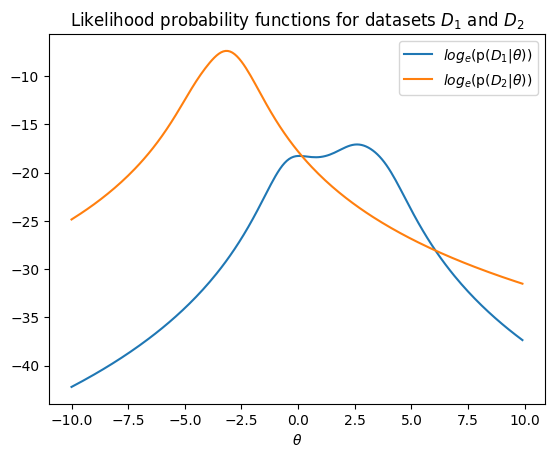

In [3]:
# Part A
# A1. 
# MLE method for the estimation of theta parameters (theta_1(hat) and theta_2(hat))

# xi: the values of indicator x for Di
x1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
x2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])
thetaStart = -10
thetaStop = 10
thetaStep = 0.1

# the various theta for which we compute the pdf
thetaRange = np.arange(thetaStart, thetaStop, thetaStep)

# xSpace: has the same x in each column
# thetaSpace: has the same theta in each row
# each row has the likelihood values for a single theta
x1Space, theta1Space = np.meshgrid(x1, thetaRange)
x2Space, theta2Space = np.meshgrid(x2, thetaRange)

# x1Space, theta1Space and p1 are all of dimensions: len(thetaRange) x len(x1) 
# Accordingly for x2Space, thetaSpace and p2
p1 = np.empty((x1Space.shape))     # same as p1 = np.empty((theta1Space.shape))     
p1 = (1/pi)*(1/(1+np.power((x1Space-theta1Space), 2)))

p2 = np.empty((x2Space.shape))     # same as p2 = np.empty((theta2Space.shape))     
p2 = (1/pi)*(1/(1+np.power((x2Space-theta2Space), 2)))


# pDGivenTheta1: the product of all probability density functions for all data x for 
# a specific theta. In other words, it is the product of all elements of a column
# multiply.reduce(arr, 0) returns the array containing the product of the
# elements of arr over dimension 1 (product of elements of each row).
# Same goes for the pDGivenTheta2
pDGivenTheta1 = np.multiply.reduce(p1, 1)
pDGivenTheta2 = np.multiply.reduce(p2, 1)

logPDTheta1 = np.log(pDGivenTheta1)
logPDTheta2 = np.log(pDGivenTheta2)


fig, ax0 = plt.subplots(1, 1)
ax0.plot(thetaRange, logPDTheta1, label=r'$log_e$(p($D_1\vert$$\theta$))')
ax0.plot(thetaRange, logPDTheta2, label=r'$log_e$(p($D_2\vert$$\theta$))')
ax0.legend()
ax0.set_xlabel(r'$\theta$')
ax0.set_xlabel(r'$\theta$')
ax0.set_title(r'Likelihood probability functions for datasets '\
    r'$D_1$ and $D_2$')


# Find the exact theta giving the maximum logPDTheta
# Since there are two maxima, we estimate the theta parameter 
# from the largest of the two.


maxLogPDThetaIndexMat = np.where(logPDTheta1 == np.max(logPDTheta1))
# Index corresponding to the maximum likelihood
maxLogPDTheta1Index = maxLogPDThetaIndexMat[0][0]
# theta1 value estimation (rounded in the last 3 decimals)
theta1Estimate = round(thetaRange[maxLogPDTheta1Index], 3)


maxLogPDThetaIndexMat = np.where(logPDTheta2 == np.max(logPDTheta2))
# Index corresponding to the maximum likelihood
maxLogPDTheta2Index = maxLogPDThetaIndexMat[0][0]
# theta2 value estimation (rounded in the last 3 decimals)
theta2Estimate = round(thetaRange[maxLogPDTheta2Index], 3)


display(Math('MLE:The \; best\; estimators\; for\; '+r'\theta_{1}, \;'+\
    r'\theta_{2}\; are:\\' +\
    r'\hat \theta_{1} = ' +\
         str(round(theta1Estimate, 2))+\
    r'\\ \hat \theta_{2} = ' + \
        str(round(theta2Estimate, 2))))

Decision rule for classification of x based on the sign of g(x)
------------------------------------------------
x Interval	Sign of g(x) 	Classified as


<IPython.core.display.Math object>

<IPython.core.display.Math object>

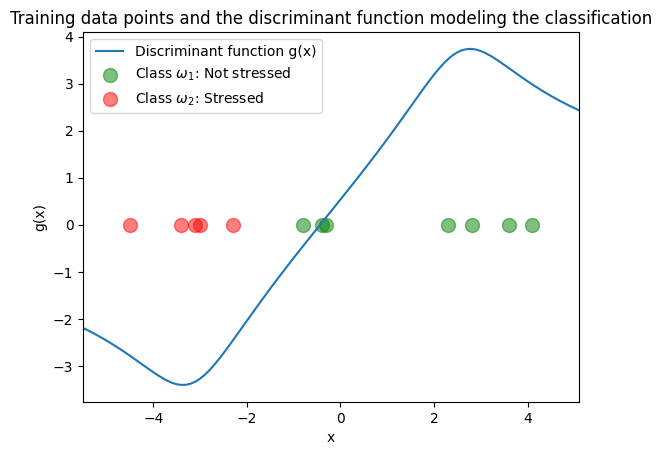

In [4]:
# A2. 
# Calculation of the discriminant function g(x)
xStart = -10
xStop = 10
xStep = 0.1
xRange = np.arange(xStart,xStop, xStep)

pXGivenTheta1Range = (1/pi)*(1/(1+np.power((xRange-theta1Estimate), 2)))
pXGivenTheta2Range = (1/pi)*(1/(1+np.power((xRange-theta2Estimate), 2)))

# The apriori probabilities are given by the relative frequency 
# of the cases of each class (omega1: not stressed, omega2: stressed)
aPriori1 = len(x1)/(len(x1)+len(x2))
aPriori2 = len(x2)/(len(x1)+len(x2))

# gX: the discriminant function calculated over a range of x (xRange)
gX = np.log(pXGivenTheta1Range) - np.log(pXGivenTheta2Range) + aPriori1 - aPriori2

# Pdfs calculated on the x1 and x2
pXGivenTheta1OnX1= (1/pi)*(1/(1+np.power((x1-theta1Estimate), 2)))
pXGivenTheta2OnX2 = (1/pi)*(1/(1+np.power((x2-theta2Estimate), 2)))

# A2.1 
# Plot the dataset points and the discriminant function
fig, ax = plt.subplots()
ax.scatter(x1, np.zeros_like(x1), s = 100, c="green", alpha=0.5, marker='o',
           label = r'Class $\omega_1$: Not stressed')
ax.scatter(x2, np.zeros_like(x2), s = 100, c="red", alpha=0.5, marker='o',
           label = r'Class $\omega_2$: Stressed')
ax.plot(xRange, gX, label = 'Discriminant function g(x)')


# The bound to plot the discriminant function and the points 
# is set for convenience from the min up to the max values of the 
# indicator x with a margin of +-1.  
lowBoundX = np.min(np.concatenate((x1, x2), axis=0))
highBoundX = np.max(np.concatenate((x1, x2), axis=0))
ax.set_xlim([lowBoundX-1, highBoundX+1])
ax.set_xlabel("x")
ax.set_ylabel("g(x)")
ax.set_title("MLE: Training data points and the discriminant function modeling the classification")

plt.legend()


# A2.2
# Calculation of the regions of x where sign(h(x)) = - or + 

# gXSignList is a list saving all 2d lists [x, signIndicator] where 
# x is the datapoint where the sign of g(x) changes 
# (- => + or + => -) and 
# signIndicator is +1 if the gX is ascending
# or -1 if gX is descending
gXSignList = []

# counts how many times g(x) changed sign
signChangesCounter = -1

for xi in range(len(gX)-1):
    # if the gX[xi] and gX[xi+1] are one positive and one negative 
    # gX changed sign from xi to xi+1, so this is a 
    if gX[xi] * gX[xi + 1] <= 0:
        # check for gX ascending
        if gX[xi] < gX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            gXSignList.append([xRange[xi], +1])
        # check for gX descending
        elif gX[xi] > gX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            gXSignList.append([xRange[xi], -1])


# list => numpy array
gXSignArr = np.array(gXSignList)

# Cell output for the decision rule
print('Decision rule for classification of x based on the sign of g(x)')
print('------------------------------------------------')
print('x Interval\tSign of g(x) \tClassified as')


# Bounds of the intervals of x where gX changes sign 
# lowerBound is initialised as the first x that we calculate g(x) for (xStart)
lowerBound = xStart
# upperBound becomes the x where g(x) changes sign in every iteration
# Therefore, initialisation value can be arbitrary (does not take part in calculations)
upperBound = -100  

# Display the decision rule (based on the sign of g(x))
for signChangeCounter in range(0, len(gXSignArr)):
    # in every iteration the upperbound becomes the 
    upperBound = round(gXSignArr[signChangeCounter][0], 3)
    # if gX is ascending in xi then up to this point g(x) < 0
    if gXSignArr[signChangeCounter][1] == 1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad - \qquad\qquad \omega2:stressed'))
    # if gX is ascending in xi then up to this point g(x) > 0
    elif gXSignArr[signChangeCounter][1] == -1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad + \qquad\qquad \omega1: not \ stressed'))
    lowerBound = upperBound

# same code as above but for the last x where x changes sign until the
# largest x up to which g(x) was calculated (xStop)
upperBound = xStop 
if gXSignArr[signChangeCounter][1] == 1:
        # display(Math(r'['+str(lowerBound)+r', \quad'+ str(upperBound))) 
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad + \qquad\qquad \omega1: not \ stressed'))
elif gXSignArr[signChangeCounter][1] == -1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad - \qquad\qquad \omega2: stressed'))
    
# Remarks:
# The derived decision rule misclassifies some of our training data 
# (see green spots having a negative g(x))

<IPython.core.display.Math object>

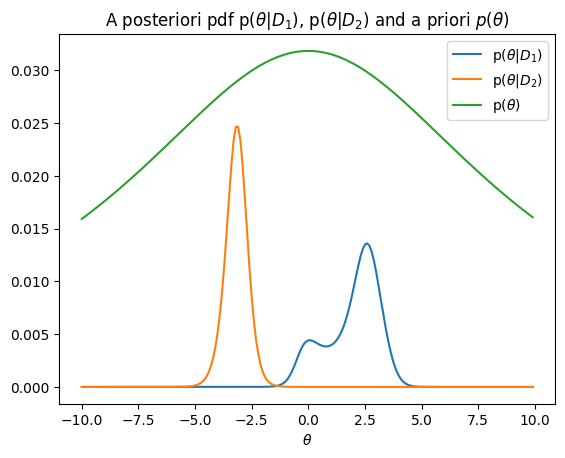

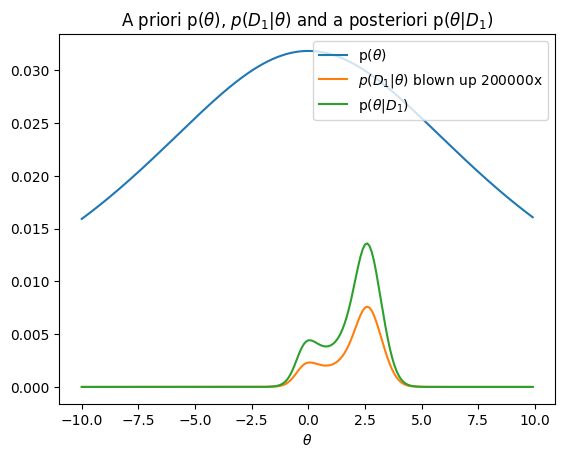

In [5]:
# Part B
# B1. 
# Baeysian estimation of parameter theta


# Calculation of p(D|theta) across all values of theta (we can do this since p(x|theta) 
# is considered known for each class, see Part A)
# These are calculated in the exact same way as in the maximum likelihood estimation of theta
# so their calculation will not be repeated here (they are the variables pDGivenTheta1, pDGivenTheta2).


# p(theta) is the same for both classes
aPrioriTheta = np.array(1/(10*pi)*1/(1+np.power(thetaRange/10, 2)))

denominatorIntegral1 = 0
denominatorIntegral2 = 0

# Trapezoid rule for the integration across all theta
for i in range(len(thetaRange)-1):
    # The two consecutive pdf heights are the bases of each trapezoid   
    denominatorIntegral1 = denominatorIntegral1 + \
        thetaStep*float((pDGivenTheta1[i]+pDGivenTheta1[i+1])/2) 
    denominatorIntegral2 = denominatorIntegral2 + \
        thetaStep*float((pDGivenTheta2[i]+pDGivenTheta2[i+1])/2) 


# p(theta), p(D|theta) and the denominator of the formula are now known 
# so we can calculate p(theta|D) 
pThetaGivenD1 = np.multiply(pDGivenTheta1, aPrioriTheta)/denominatorIntegral1 
pThetaGivenD2 = np.multiply(pDGivenTheta2, aPrioriTheta)/denominatorIntegral2

# Graph p(theta|D_1), p(theta|D_2) and p(theta)   
# The best estimation for theta for each class is its global maximum.
fig, ax = plt.subplots()
ax.set_title(r'A posteriori pdf p($\theta$$\vert$$D_1$), p($\theta$$\vert$$D_2$) '\
     r'and a priori $p(\theta)$')
ax.set_xlabel(r'$\theta$')
ax.plot(thetaRange, pThetaGivenD1, label = r'p($\theta$$\vert$$D_1$)')
ax.plot(thetaRange, pThetaGivenD2, label = r'p($\theta$$\vert$$D_2$)')
ax.plot(thetaRange, aPrioriTheta, label = r'p($\theta$)')
ax.legend()


# Graph to show how p(theta) is used to derive p(theta|D_1). 
fig2, ax2 = plt.subplots()
ax2.set_title(r'A priori p($\theta$), $p(D_1\vert\theta)$ and a posteriori p($\theta$$\vert$$D_1$)')
ax2.plot(thetaRange, aPrioriTheta, label = r'p($\theta$)')
scalingFactor = 200000
ax2.plot(thetaRange, pDGivenTheta1*scalingFactor, \
    label = r'$p(D_1\vert\theta)$ blown up ' + str(scalingFactor) + 'x')
ax2.plot(thetaRange, pThetaGivenD1, label = r'p($\theta$$\vert$$D_1$)')
ax2.set_xlabel(r'$\theta$')
# The legend is placed on the upper right corner of the graph
ax2.legend(loc = 1)


# Cell output for the bayes estimation of theta
maxPThetaGivenD1Mat = np.where(pThetaGivenD1 == np.max(pThetaGivenD1))
maxPThetaGivenD1Index = maxPThetaGivenD1Mat[0][0]

maxPThetaGivenD2Mat = np.where(pThetaGivenD2 == np.max(pThetaGivenD2))
maxPThetaGivenD2Index = maxPThetaGivenD2Mat[0][0]

display(Math('Bayes:The \; best\; estimators\; for\; '+r'\theta_{1}, \;'+\
    r'\theta_{2}\; are:\\' +\
    r'\hat \theta_{1} = ' +\
         str(round(thetaRange[maxPThetaGivenD1Index], 2))+\
    r'\\ \hat \theta_{2} = ' + \
        str(round(thetaRange[maxPThetaGivenD2Index], 2))))


# Remarks: p(theta) is so much wider than p(theta|D_1) that
# it is approximately constant for the theta
# where p(D_1|theta) is non zero (theta lying in [-5, 5]).
# More specifically, p(theta) lies in (0.025, 0.032) and 
# together with the integral of the denominator, they scale p(D_1|theta) up and give 
# p(theta|D_1) as a result which much narrower.
# Same goes for the pdfs of D_2

Decision rule for classification of x based on the sign of h(x)
------------------------------------------------
x Interval	Sign of h(x) 	Classified as


<IPython.core.display.Math object>

<IPython.core.display.Math object>

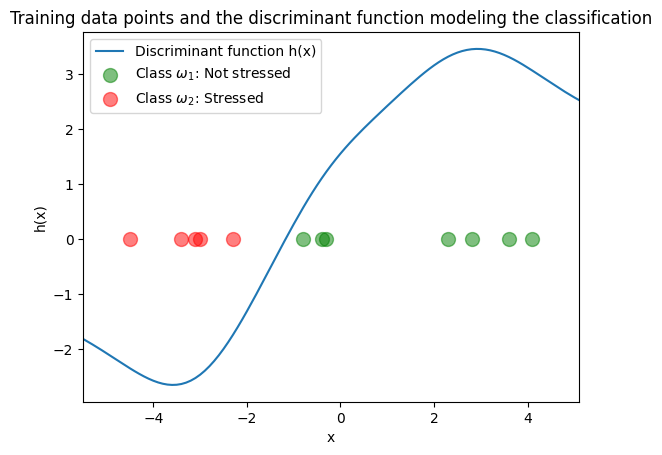

In [6]:
# B2. 
# Calculation of the discriminant function h(x)

# Find p(x|D_i) for each class D_i
# - Variable      = represented quantity
# - pXGivenTheta  = p(x|theta, D) = p(x|theta) since we assume the same p(x|theta)
# for both classes
# - pThetaGivenD1 = p(theta|D_1)

# Integral calculation for the p(x|D_1) 
pXGivenD1 = np.zeros(len(xRange))
pXGivenD2 = np.zeros(len(xRange))

thetaSpace, xSpace = np.meshgrid(xRange, thetaRange) 
# It is the same for both classes
pXGivenTheta = (1/pi)*(1/(1+np.power((xSpace-thetaSpace), 2)))


# p(x|theta,D), p(theta|D) are known (p(x|theta,D) = p(x|theta) for a specific class D)
# so we can calculate p(x|D)
# Calculation of p(x|D)
for xCount in range(len(xRange)): 
    for thetaCount in range(len(thetaRange)-1):
        pXGivenD1[xCount] = pXGivenD1[xCount] +\
            (pXGivenTheta[xCount][thetaCount]*pThetaGivenD1[thetaCount] +\
                pXGivenTheta[xCount][thetaCount+1]*pThetaGivenD1[thetaCount+1])/2*thetaStep

for xCount in range(len(xRange)): 
    for thetaCount in range(len(thetaRange)-1):
        pXGivenD2[xCount] = pXGivenD2[xCount] +\
            (pXGivenTheta[xCount][thetaCount]*pThetaGivenD2[thetaCount] +\
                pXGivenTheta[xCount][thetaCount+1]*pThetaGivenD2[thetaCount+1])/2*thetaStep

# # (Optional) Uncomment this section to plot p(x|D_1) and p(x|D_2) 
# fig3, ax3 = plt.subplots()
# ax3.set_title(r'p(x$\vert$$D_1$) and p(x$\vert$$D_2$)')
# ax3.plot(xRange, pXGivenD1, label = r'p(x$\vert$$D_1')
# ax3.plot(xRange, pXGivenD2, label = r'p(x$\vert$$D_2')
# ax3.set_xlabel('x')


# hX: the discriminant function calculated over a range of x (xRange)
hX = np.zeros(len(xRange))
hX = np.log(pXGivenD1) - np.log(pXGivenD2) + np.log(aPriori1) - np.log(aPriori2) 


# B2.1 
# Plot the dataset points and the discriminant function
fig, ax = plt.subplots()
ax.set_title("Bayes: Training data points and the discriminant function modeling the classification")
ax.set_xlabel('x')
ax.scatter(x1, np.zeros_like(x1), s = 100, c="green", alpha=0.5, marker='o',
           label = r'Class $\omega_1$: Not stressed')
ax.scatter(x2, np.zeros_like(x2), s = 100, c="red", alpha=0.5, marker='o',
           label = r'Class $\omega_2$: Stressed')
ax.plot(xRange, hX, label = 'Discriminant function h(x)')


minX = np.min(np.concatenate((x1, x2), axis=0))
maxX = np.max(np.concatenate((x1, x2), axis=0))
ax.set_xlim([minX-1, maxX+1])
ax.set_xlabel("x")
ax.set_ylabel("h(x)")
plt.legend()




# B2.2
# Calculation of the regions of x where sign(h(x)) = - or + 

# hXSignList is a list saving all 2d lists [x, signIndicator] where 
# x is the datapoint where the sign of h(x) changes 
# (- => + or + => -) and 
# signIndicator is +1 if the hX is ascending
# or -1 if hX is descending
hXSignList = []

# counts how many times h(x) changed sign
signChangesCounter = -1

for xi in range(len(hX)-1):
    # if the hX[xi] and hX[xi+1] are one positive and one negative 
    # hX changed sign from xi to xi+1, so this is a 
    if hX[xi] * hX[xi + 1] <= 0:
        # check for hX ascending
        if hX[xi] < hX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            hXSignList.append([xRange[xi], +1])
        # check for hX descending
        elif hX[xi] > hX[xi + 1]:
            signChangesCounter = signChangesCounter + 1
            hXSignList.append([xRange[xi], -1])


# list => numpy array
hXSignArr = np.array(hXSignList)

# Cell output for the decision rule
print('Decision rule for classification of x based on the sign of h(x)')
print('------------------------------------------------')
print('x Interval\tSign of h(x) \tClassified as')


# Bounds of the intervals of x where hX changes sign 
# lowerBound is initialised as the first x that we calculate h(x) for (xStart)
lowerBound = xStart
# upperBound becomes the x where h(x) changes sign in every iteration
# Therefore, initialisation value can be arbitrary (does not take part in calculations)
upperBound = -100  

# Display the decision rule (based on the sign of h(x))
for signChangeCounter in range(0, len(hXSignArr)):
    # in every iteration the upperbound becomes the 
    upperBound = round(hXSignArr[signChangeCounter][0], 3)
    # if hX is ascending in xi then up to this point h(x) < 0
    if hXSignArr[signChangeCounter][1] == 1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad - \qquad\qquad \omega2:stressed'))
    # if hX is ascending in xi then up to this point h(x) > 0
    elif hXSignArr[signChangeCounter][1] == -1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad + \qquad\qquad \omega1: not \ stressed'))
    lowerBound = upperBound

# same code as above but for the last x where x changes sign until the
# largest x up to which h(x) was calculated (xStop)
upperBound = xStop 
if hXSignArr[signChangeCounter][1] == 1:
        # display(Math(r'['+str(lowerBound)+r', \quad'+ str(upperBound))) 
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad + \qquad\qquad \omega1: not \ stressed'))
elif hXSignArr[signChangeCounter][1] == -1:
        display(Math('['+str(lowerBound)+r', \quad'+ str(upperBound) + \
            r']\qquad\qquad - \qquad\qquad \omega2: stressed'))


# Remarks / Comparison of the methods: 
#
#   The MLE fails to predict correctly some of its training data (see graph in A2)
# (here the training data are used for the testing as well).
#   This is because the specific function p(x|theta) we chose for  
# the estimation is maximum for theta(hat) = x, for a given x.
# However, we do not have a single point x to estimate theta from.
# Instead, a set (D) of x values is used.
# Consequently, theta must be such that p(D|theta) = Product(p(x|theta)) is maximised.
# More loosely explained, the theta estimate must now be equal to 
# the x value with the highest concentration of training data points (the global maximum
# of the likelihood function).
#   However, even if there exist high concentrations of datapoints x, 
# in intervals other than where the global maximum lies (local maxima of p(x|theta)),
# only the highest one (global maximum) will be taken into account for the estimation.
# The local maxima will be ignored.
# In conclusion, the MLE estimation method works better in cases when there
# is a single (global) maximum of p(x|theta) and less accurately when more local ones
# are present.
#
#   The Bayesian parameter estimation method derives a decision rule 
# that classifies correctly all of the training data (see graph in B2).
#   This is because p(theta|D), which is used for the parameter estimation,
# considers the distribution (meaning both the golabl and the local maxima
# mentioned before) of all the training dataset points x in D.
#   To further explain, p(theta|D) is the 
# probability distribution of theta given all the points in the dataset. 
# p(theta|D) is used to calculate p(x|D) and then the disriminant function h(x).
# Therefore, in contrast with MLE, the Bayesian estimation method 
# takes the whole distribution of theta into consideration to derive the decision rule
# making it so it classifies correctly all the training data points (as stressed or not).